## 1. Librerías


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Warning
import warnings
warnings.filterwarnings("ignore")

url = "https://raw.githubusercontent.com/AlexArce2000/Data-Science/refs/heads/main/datos/airbnb_Buenos_Aires.csv"
df = pd.read_csv(url)


## 2. Analisis Exploratorio

In [ ]:
df.head()

,ID_Alojamiento,URL_Alojamiento,Desc_Alojamiento,ID_Host,Nombre_Host,Fecha_Ini_Host,Ubicacion_Host,Tiempo_Rpta_Host,Ratio_Rpta_Host,Superhost,...,Noches_Min,Noches_Max,Cant_Reseñas_Alojamiento,Fecha_Ini_Reseña,Fecha_Ult_Reseña,Score_Rating,Punto_Geo_Alojamiento,Precio_Noche,Moneda,Amenidades
0,11508,https://www.airbnb.com/rooms/11508,Condo in Buenos Aires · ?4.79 · 1 bedroom · 1 ...,42762,Candela,10/1/2009,"New York, NY",within an hour,100%,t,...,3.0,1125.0,39.0,7/2/2012,11/30/2023,4.79,"[-58.42415, -34.58184]",66.0,USD,"['Bathtub', 'Hair dryer', 'Cleaning products',..."
1,14222,https://www.airbnb.com/rooms/14222,Rental unit in Palermo/Buenos Aires · ?4.77 · ...,87710233,María,8/3/2016,"Buenos Aires, Argentina",within an hour,100%,t,...,7.0,100.0,114.0,7/10/2012,11/30/2023,4.77,"[-58.41036, -34.58617]",19.0,USD,"['Bathtub', 'Hot water', 'Washer', 'Essentials..."
2,15074,https://www.airbnb.com/rooms/15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,12/2/2009,NaN,NaN,NaN,f,...,29.0,730.0,0.0,NaN,NaN,NaN,"[-58.46599, -34.53892]",30.0,USD,"['Washer', 'Dryer', 'TV with standard cable', ..."
3,16695,https://www.airbnb.com/rooms/16695,Loft in Buenos Aires · ?4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,12/21/2009,"Buenos Aires, Argentina",within an hour,100%,t,...,2.0,1125.0,45.0,3/4/2011,11/30/2019,4.28,"[-58.37611, -34.61439]",49.0,USD,"['Hair dryer', 'Hot water', 'Essentials', 'Tow..."
4,20062,https://www.airbnb.com/rooms/20062,Rental unit in Buenos Aires · ?4.93 · 2 bedroo...,75891,Sergio Damian,1/31/2010,"Buenos Aires, Argentina",within an hour,100%,t,...,2.0,365.0,303.0,5/19/2010,12/26/2023,4.93,"[-58.441605, -34.581848]",100.0,USD,"['City skyline view', 'Bathtub', 'Hair dryer',..."


In [ ]:
df.shape

(33491, 27)

In [ ]:
df.dtypes

,0
ID_Alojamiento,object
URL_Alojamiento,object
Desc_Alojamiento,object
ID_Host,object
Nombre_Host,object
Fecha_Ini_Host,object
Ubicacion_Host,object
Tiempo_Rpta_Host,object
Ratio_Rpta_Host,object
Superhost,object


In [ ]:
df.iloc[:,3:].describe()

#Genera estadísticas descriptivas de las columnas seleccionadas, como la cuenta de valores no nulos,
#la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50% y 75%).


,Barrio_Latitude,Barrio_Logitude,Capacidad_Alojamiento,Noches_Min,Noches_Max,Cant_Reseñas_Alojamiento,Precio_Noche
count,33485.000000,33485.000000,33485.000000,33485.000000,33485.000000,33485.000000,29844.000000
mean,-34.585402,-58.387676,2.913334,5.785546,463.801672,22.554636,49.956038
std,0.687386,3.299767,1.503197,23.603235,687.298504,38.801984,54.758443
min,-34.693700,-58.530890,0.000000,1.000000,1.000000,0.000000,0.000000
25%,-34.601900,-58.438090,2.000000,2.000000,90.000000,1.000000,26.000000
50%,-34.590430,-58.419707,2.000000,3.000000,365.000000,8.000000,36.000000
75%,-34.580540,-58.393560,4.000000,4.000000,1125.000000,27.000000,54.000000
max,80.000000,365.000000,25.000000,1000.000000,99999.000000,687.000000,998.000000


In [ ]:
df.isnull().sum()

#Valores nulos en cada columna


,0
ID_Alojamiento,0
URL_Alojamiento,0
Desc_Alojamiento,0
ID_Host,0
Nombre_Host,10
Fecha_Ini_Host,11
Ubicacion_Host,7621
Tiempo_Rpta_Host,3612
Ratio_Rpta_Host,3612
Superhost,72


### Tratar los valores nulos y volver numérico a las amenidades



In [ ]:
df['Amenidades_Numerico'] = df['Amenidades'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
df['Cant_Baños'] = df['Cant_Baños'].fillna('').astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
df['Cant_Baños'] = df['Cant_Baños'].replace('', np.nan)



### Correlación

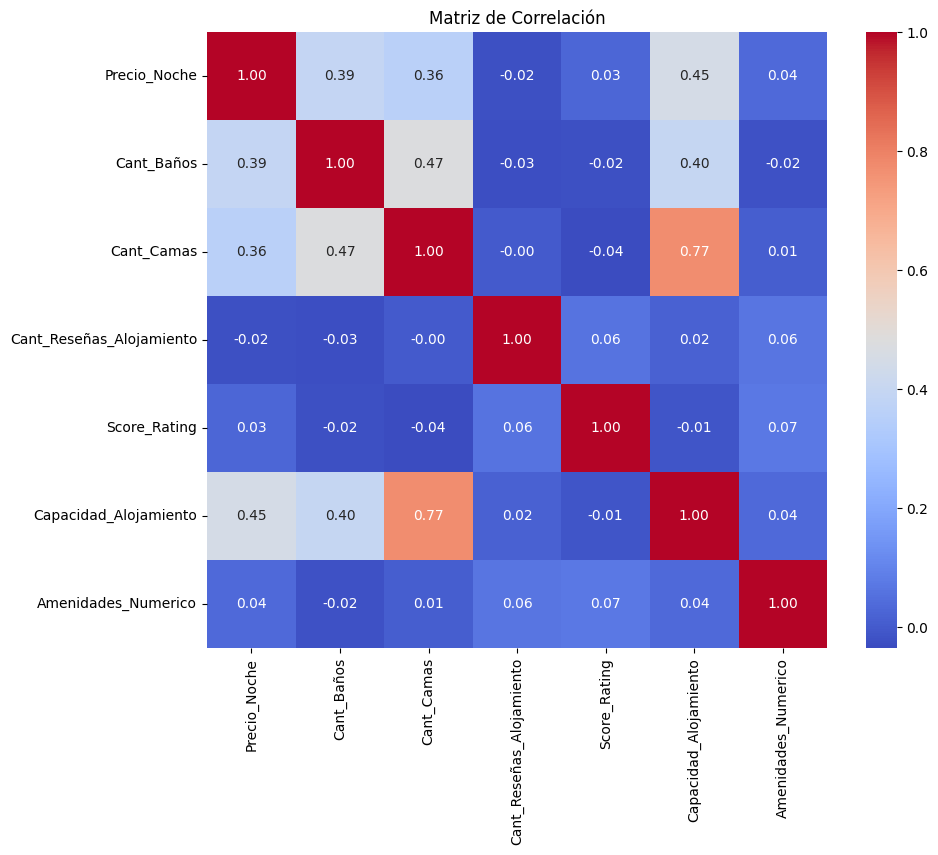

In [ ]:
# Seleccionar solo las columnas numéricas relevantes
df = pd.get_dummies(df, columns=['Tipo_Propiedad', 'Barrio_Alojamiento'], drop_first=True)
df_corr = df[['Precio_Noche', 'Cant_Baños', 'Cant_Camas', 'Cant_Reseñas_Alojamiento','Score_Rating', 'Capacidad_Alojamiento', 'Amenidades_Numerico','Tipo_Propiedad', 'Barrio_Alojamiento']]
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')  # Convertir a numérico y reemplazar errores con NaN
# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
df['Barrio_Alojamiento'].value_counts()

,count
Barrio_Alojamiento,
Palermo,10940
Recoleta,4942
San Nicolas,2020
Belgrano,1844
Retiro,1567
Monserrat,1465
Almagro,1228
Balvanera,1187
Villa Crespo,1130


Número de alojamientos únicos: 33489
Hosts con múltiples alojamientos (Superhosts):
ID_Host
1021694      258
11256892     209
55553719     168
278440549    161
51699880     136
3469227      132
132838002    127
210147055    115
234799487    114
441482178    112
Name: count, dtype: int64


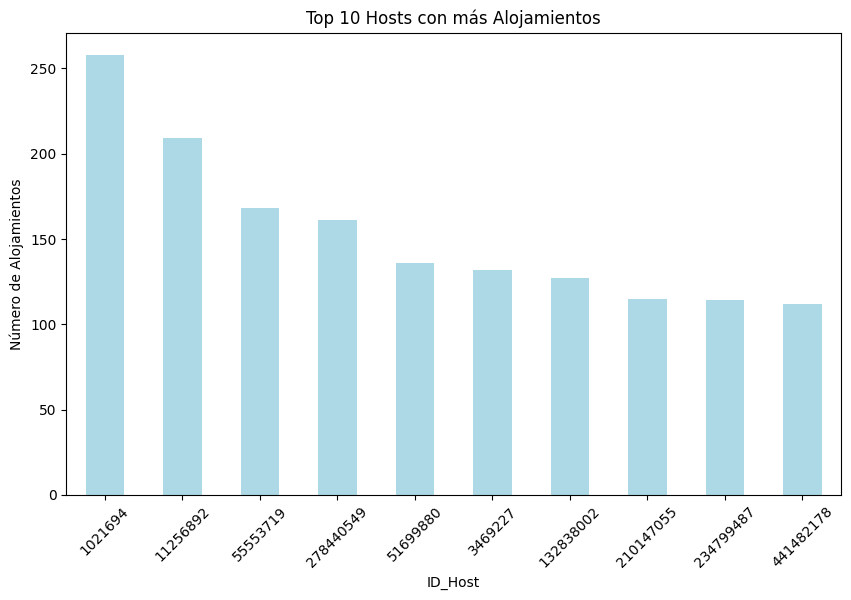

In [ ]:
# Número de alojamientos únicos
unique_accommodations = df['ID_Alojamiento'].nunique()
print(f"Número de alojamientos únicos: {unique_accommodations}")

# Contar el número de alojamientos por host
hosts_accommodations = df['ID_Host'].value_counts()

# Identificar hosts con múltiples alojamientos
superhosts = hosts_accommodations[hosts_accommodations > 1]

print("Hosts con múltiples alojamientos (Superhosts):")
print(superhosts.head(10))

# Visualización de los 10 hosts con más alojamientos
plt.figure(figsize=(10, 6))
superhosts.head(10).plot(kind='bar', color='lightblue')
plt.title("Top 10 Hosts con más Alojamientos")
plt.xlabel("ID_Host")
plt.ylabel("Número de Alojamientos")
plt.xticks(rotation=45)
plt.show()

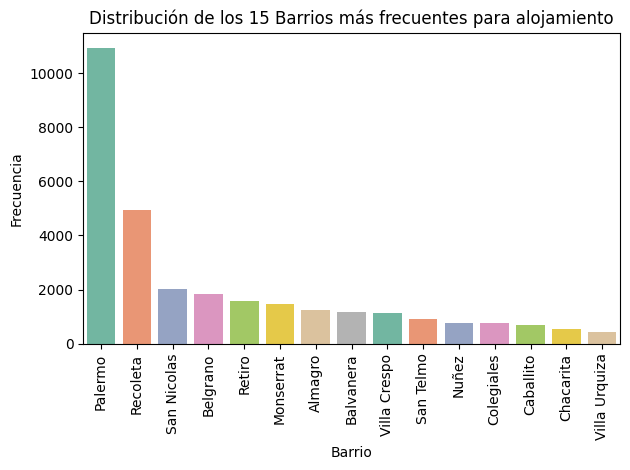

In [ ]:
# Contar las frecuencias de los barrios
barrio_counts = df['Barrio_Alojamiento'].value_counts()

# Seleccionar los 15 barrios más frecuentes
top_15_barrios = barrio_counts.head(15).index

# Filtrar el DataFrame para que contenga solo estos 15 barrios
df_top_15 = df[df['Barrio_Alojamiento'].isin(top_15_barrios)]
colors = sns.color_palette("Set2", n_colors=25)
color_dict = {barrio: colors[i] for i, barrio in enumerate(top_15_barrios)}

# Crear el gráfico de barras con colores personalizados
ax = sns.countplot(x="Barrio_Alojamiento", data=df_top_15, order=top_15_barrios, palette=color_dict)

# Añadir título y etiquetas
ax.set_title("Distribución de los 15 Barrios más frecuentes para alojamiento") # 2009-2023
ax.set_xlabel("Barrio")
ax.set_ylabel("Frecuencia")

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=90)

# Ajustar el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
df['Tipo_Propiedad'].value_counts()

,count
Tipo_Propiedad,
Entire rental unit,23712
Entire condo,3649
Private room in rental unit,1091
Entire serviced apartment,1046
Entire loft,773
...,...
Pension,1
Private room in religious building,1
Boat,1


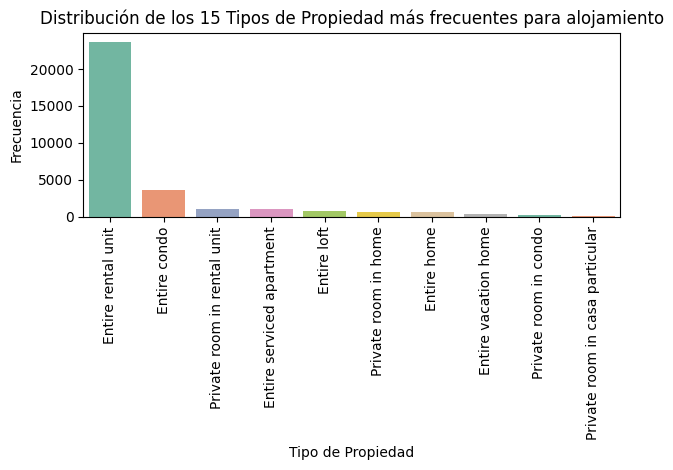

In [ ]:
# Contar las frecuencias de los tipos de propiedad
tipo_propiedad_counts = df['Tipo_Propiedad'].value_counts()

# Seleccionar los 15 tipos de propiedad más frecuentes
top_10_tipo_propiedad = tipo_propiedad_counts.head(10).index

# Filtrar el DataFrame para que contenga solo estos 15 tipos de propiedad
df_top_10_propiedad = df[df['Tipo_Propiedad'].isin(top_10_tipo_propiedad)]

# Crear una paleta de colores. Aquí asignamos un color para cada tipo de propiedad.
colors = sns.color_palette("Set2", n_colors=25)

# Crear un diccionario que mapea cada tipo de propiedad a un color específico
color_dict = {tipo: colors[i] for i, tipo in enumerate(top_10_tipo_propiedad)}

# Crear el gráfico de barras con colores personalizados
ax = sns.countplot(x="Tipo_Propiedad", data=df_top_10_propiedad, order=top_10_tipo_propiedad, palette=color_dict)

# Añadir título y etiquetas
ax.set_title("Distribución de los 15 Tipos de Propiedad más frecuentes para alojamiento")
ax.set_xlabel("Tipo de Propiedad")
ax.set_ylabel("Frecuencia")

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=90)

# Ajustar el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Barrio vs Tipo de propiedad

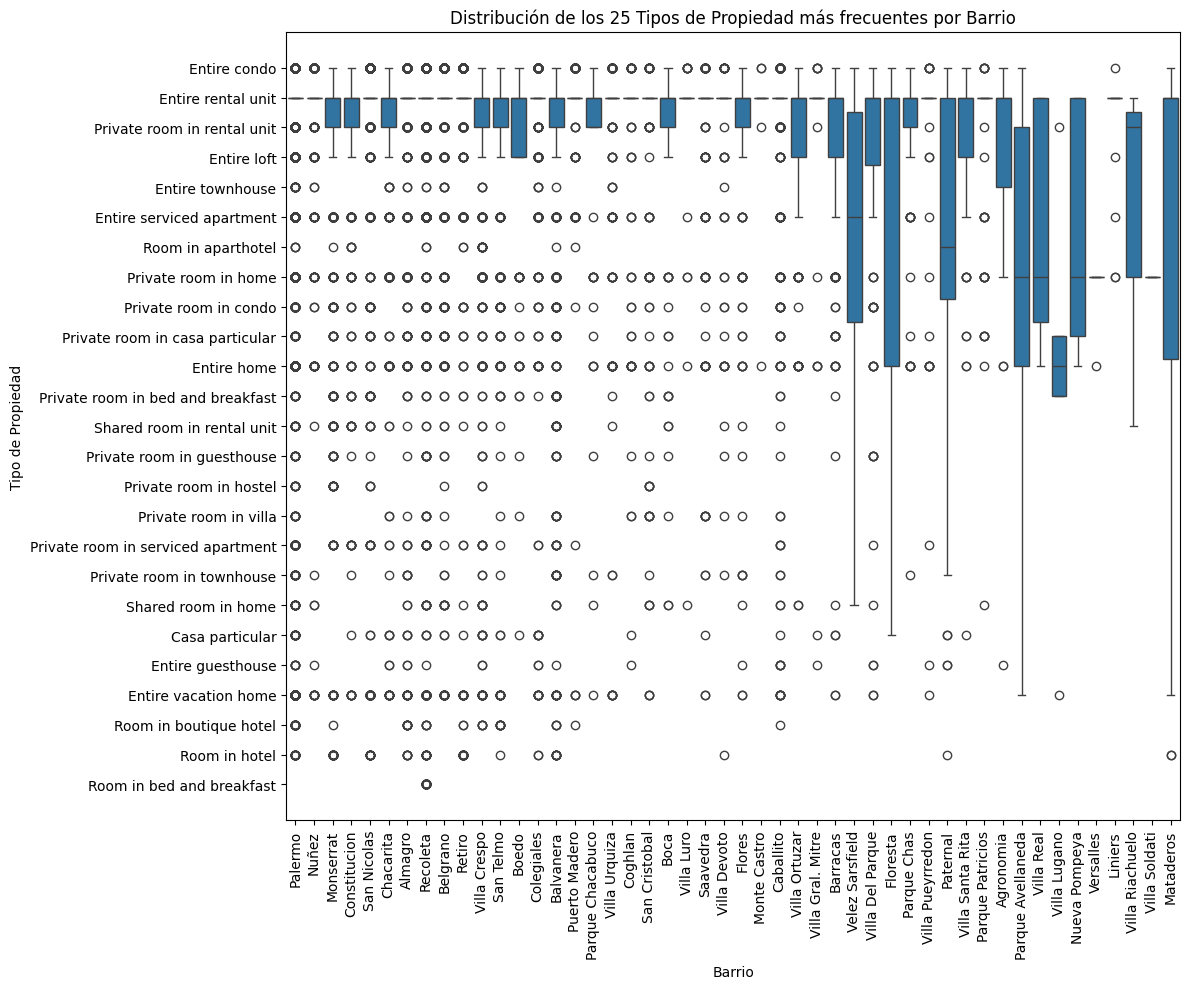

In [ ]:
# Filtrar el DataFrame para eliminar barrios o tipos de propiedad vacíos
df_filtered = df.dropna(subset=['Barrio_Alojamiento', 'Tipo_Propiedad'])

# Contar las frecuencias de los tipos de propiedad y seleccionar los primeros 25 más frecuentes
top_25_tipo_propiedad = df_filtered['Tipo_Propiedad'].value_counts().head(25).index

# Filtrar el DataFrame para incluir solo estos 25 tipos de propiedad
df_top_25 = df_filtered[df_filtered['Tipo_Propiedad'].isin(top_25_tipo_propiedad)]

# Crear el gráfico de caja solo con los barrios y tipos de propiedad más frecuentes
plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=df_top_25, x='Barrio_Alojamiento', y='Tipo_Propiedad')

# Título y etiquetas
ax.set_title('Distribución de los 25 Tipos de Propiedad más frecuentes por Barrio')
ax.set_xlabel('Barrio')
ax.set_ylabel('Tipo de Propiedad')

# Rotar etiquetas si es necesario
plt.xticks(rotation=90)

# Ajustar el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Precio_Noche                           float64
Cant_Baños                             float64
Capacidad_Alojamiento                  float64
Score_Rating                           float64
Amenidades_Numerico                    float64
                                        ...   
Barrio_Alojamiento_Villa Ortuzar          bool
Barrio_Alojamiento_Villa Pueyrredon       bool
Barrio_Alojamiento_Villa Real             bool
Barrio_Alojamiento_Villa Santa Rita       bool
Barrio_Alojamiento_Villa Urquiza          bool
Length: 103, dtype: object
   Score_Rating  Amenidades_Numerico
0          4.79                 16.0
1          4.77                 19.0
3          4.28                 17.0
4          4.93                 17.0
6          4.66                 16.0


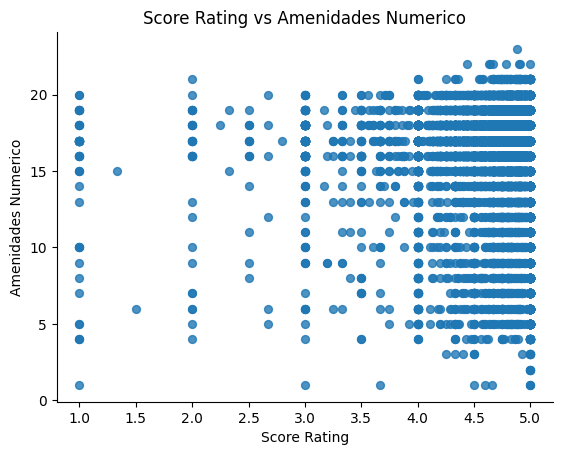

In [ ]:
# Asegurarte de que las columnas 'Score_Rating' y 'Amenidades_Numerico' sean numéricas
df['Score_Rating'] = pd.to_numeric(df['Score_Rating'], errors='coerce')
df['Amenidades_Numerico'] = pd.to_numeric(df['Amenidades_Numerico'], errors='coerce')

# Convertir explícitamente a float para evitar problemas de tipo de datos
df['Score_Rating'] = df['Score_Rating'].astype(float)
df['Amenidades_Numerico'] = df['Amenidades_Numerico'].astype(float)

# Verificar los tipos de datos
print(df.dtypes)

# Eliminar cualquier fila con NaN en las columnas de interés
df_clean = df.dropna(subset=['Score_Rating', 'Amenidades_Numerico'])

# Verificar los valores de las primeras filas para asegurarnos de que se eliminaron los NaN
print(df_clean[['Score_Rating', 'Amenidades_Numerico']].head())

# Graficar después de limpiar los datos
df_clean.plot(kind='scatter', x='Score_Rating', y='Amenidades_Numerico', s=32, alpha=.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Score Rating')
plt.ylabel('Amenidades Numerico')
plt.title('Score Rating vs Amenidades Numerico')
plt.show()


## Regresión Lineal

Error Cuadrático Medio (MSE): 1372.1697429735593
Coeficiente de Determinación (R²): 0.38067873009720843
Error Absoluto Medio (MAE): 19.199362462157055
Mean Cross-Validated MSE: 1.6503496668531644e+19


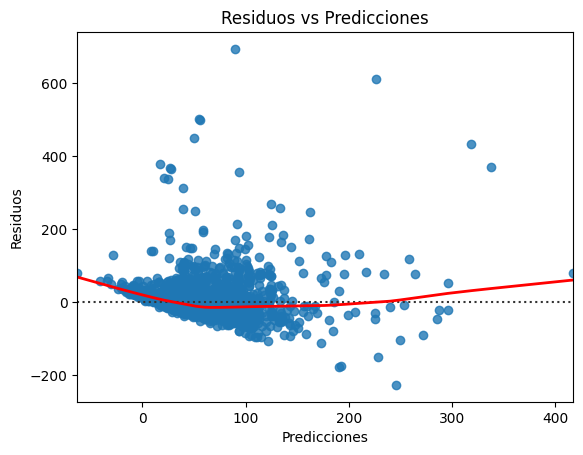

In [ ]:

# Preparar los datos
variables = ['Precio_Noche', 'Cant_Baños', 'Capacidad_Alojamiento', 'Score_Rating',
             'Amenidades_Numerico', 'Tipo_Propiedad', 'Barrio_Alojamiento']
df = df[variables].dropna()

# Asegurarte de que las columnas numéricas sean realmente numéricas
df['Cant_Baños'] = pd.to_numeric(df['Cant_Baños'], errors='coerce')
df['Capacidad_Alojamiento'] = pd.to_numeric(df['Capacidad_Alojamiento'], errors='coerce')
df['Score_Rating'] = pd.to_numeric(df['Score_Rating'], errors='coerce')
df['Amenidades_Numerico'] = pd.to_numeric(df['Amenidades_Numerico'], errors='coerce')

# Filtrar los 10 tipos de propiedades más comunes
#top_10_tipos = df['Tipo_Propiedad'].value_counts().head(10).index
#df = df[df['Tipo_Propiedad'].isin(top_10_tipos)]

# One-Hot Encoding para variables categóricas
df = pd.get_dummies(df, columns=['Tipo_Propiedad', 'Barrio_Alojamiento'], drop_first=True)

# Variables independientes y dependiente
X = df.drop(columns=['Precio_Noche'])
y = df['Precio_Noche']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

# Evaluación adicional: Validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mean_mse = -cv_scores.mean()  # Como estamos usando scoring='neg_mean_squared_error', lo convertimos a positivo

print(f'Mean Cross-Validated MSE: {cv_mean_mse}')

# Gráficos de diagnóstico: Residuos
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()


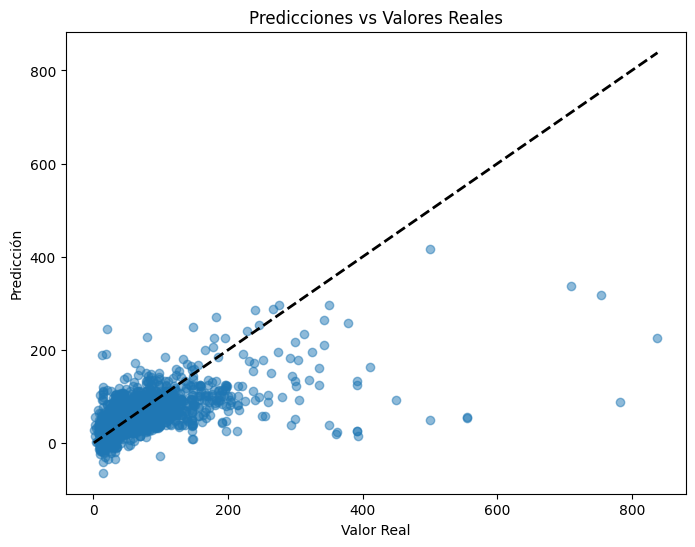

In [ ]:

# Gráfico de dispersión de las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.show()
